In [2]:
import csv
import os

import cartopy.crs as ccrs
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import dask.array as da
from   dask.distributed import Client
import cartopy
import cartopy.crs as ccrs
from scipy import stats
import matplotlib
import matplotlib.colors as colors
from matplotlib import lines
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker 
import cartopy.mpl.ticker as cticker
import pandas as pd
from matplotlib.widgets import TextBox
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA


# First we load and plot the underway data (POM from AMT28 only)

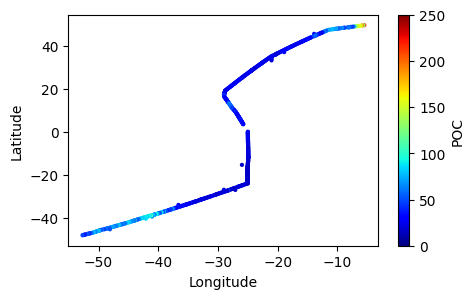

In [6]:
ds_ATM28 = pd.read_csv('../AMT28_POM.csv')
ds_ATM28['POC'] = ds_ATM28['POC']*12.0
ds_ATM28 = ds_ATM28.where(ds_ATM28.Longitude>-300) # for some reeason there are some strange longitudes, maybe associated with missing data?
fig, axs = plt.subplots(1, 1, figsize=(5, 3))
sc = ds_ATM28.plot.scatter(x='Longitude', y='Latitude', s=4, c='POC',ax=axs,vmin=0,vmax=250,cmap='jet')

# Now load other datasets, and let's see what the transects look like


In [15]:
ds_cphpyto_AMT = pd.read_csv('../AMT_surf_Cphyto.csv')
ds_cphpyto_AMT.rename(columns={'Summed phytoplankton carbon from flow cytometry': 'phyto carbon'}, inplace=True)
ds_cphpyto_AMT

,Cruise,Latitude (degrees N),Longitude (degrees E),Depth,Prochlorococcus carbon (mgC m^-3),Synechococcus carbon,Picoeukaryote carbon,Nanoeukaryote carbon,Cryptophyte carbon,Coccolithophore carbon,phyto carbon
0,AMT18,49.4824,-9.8475,3.3,0.000000,1.813691,1.918067,5.989691,1.040950,0.669824,11.432224
1,AMT18,49.3645,-11.5177,4.5,2.421189,4.317191,3.749982,9.827123,0.354869,2.112522,22.782877
2,AMT18,49.1492,-14.6524,5.6,1.441946,2.486515,2.544303,10.385794,0.615107,1.416935,18.890601
3,AMT18,48.8660,-16.1938,3.9,0.964198,1.724522,3.769224,27.265000,0.709739,2.267097,36.699780
4,AMT18,46.5907,-18.6966,4.1,1.486409,1.216719,2.449405,10.083562,0.141948,1.056261,16.434305
...,...,...,...,...,...,...,...,...,...,...,...
466,AMT28,-43.7905,-46.9552,6.3,0.004545,2.784326,3.861498,11.658833,2.791640,0.412199,21.513041
467,AMT28,-45.2973,-48.8956,6.1,0.004827,3.550180,6.557987,9.460781,1.939953,0.489487,22.003214
468,AMT28,-46.0175,-49.8723,7.0,0.005285,3.988886,4.474177,11.081844,4.636961,0.489487,24.676639
469,AMT28,-47.5651,-51.7738,5.9,0.002924,3.555970,5.289771,10.001135,3.950880,0.489487,23.290167


In [ ]:
#Make a function that maps AMT files to a common grid
def AMTtoAMT(df1,df2,v):
  df_PACE = df.copy()
  df_PACE[v] = -9999
  df_PACE[v+'_std'] = -9999
  for j in range(len(df)):
    temp = dataset_means.sel(lat=df.Latitude[j],lon=df.Longitude[j],method='nearest')
    temp_mean = temp.groupby("time.month").mean()
    temp_std = temp.groupby("time.month").std()
    df_PACE[v][j] = temp_mean.sel(month=df.month[j],method='nearest').data
    df_PACE[v+'_std'][j] = temp_std.sel(month=df.month[j],method='nearest').data
  return df_PACE
